# Exercício standard scaler
* Importe o jura como um DataFrame;
* Estandardize as variáveis contínuas;
* Transforme a variável Rock em indicadores.

In [3]:
from sklearn import preprocessing
import pandas as pd

In [4]:
jura = pd.read_csv('data\jura.csv')

In [6]:
jura.head(3)

,Xloc,Yloc,Landuse,Rock,Cd,Co,Cr,Cu,Ni,Pb,Zn
0,238.6,307.7,3,3,1.740,9.32,38.32,25.72,21.32,77.36,92.56
1,254.4,197.2,2,2,1.335,10.00,40.20,24.76,29.72,77.88,73.56
2,280.7,334.7,2,3,1.610,10.60,47.00,8.88,21.40,30.80,64.80


In [9]:
#Definindo X como as variáveis continuas do dataset
X = jura[['Cd', 'Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn']]

In [28]:
#Definindo o objeto
scaler = preprocessing.StandardScaler() #Nunca se passa dados ao se definir o objeto

In [29]:
#Aplicando o método fit ao objeto scaler com os dados 
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
#Aplicando a transformação aos dados
X_transformed = scaler.transform(X)

In [31]:
#Transformando o Rock em indicadores
rc = jura.Rock
ohe = preprocessing.OneHotEncoder()

In [34]:
#Fitando 
ohe.fit(rc.values.reshape(-1,1)) #Tem que 'reshapear' a array para que o scykit learn aceite

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [38]:
#Transformando
indicadores = ohe.transform(rc.values.reshape(-1,1))

In [39]:
#Transformando a sparse matrix em array
indicadores = indicadores.toarray()

In [40]:
#Verificando os indicadores
indicadores

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

# Exercício PCA
Calcule as PC`s para as variáveis contínuas do jura.

In [41]:
from sklearn import decomposition

In [42]:
#Definindo o objeto
pca = decomposition.PCA()

In [43]:
#Aplocando o fit
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
#Aplicando a transformação aos dados
X_pca = pca.transform(X)

In [49]:
#Verificando o resultado. Ele cospe uma numpy array
X_pca

array([[ 2.73664431e+01, -6.96737706e-02, -1.01734346e+01, ...,
         7.21742221e-01, -6.28477362e-02, -3.56167397e-03],
       [ 1.69008013e+01,  1.07027675e+01, -1.44747188e+01, ...,
        -4.92826159e+00,  2.40339480e+00, -5.05100327e-02],
       [-2.56578307e+01, -1.41125407e+01, -3.46785159e+00, ...,
         4.68929198e+00, -1.27466125e+00,  1.86140807e-01],
       ...,
       [ 1.89260540e+01, -1.19875486e+01,  1.70788108e+01, ...,
        -7.68471242e-01, -1.25487440e+00,  4.82345162e-01],
       [-2.82105941e+01,  1.20649763e+01, -1.16435156e+01, ...,
        -4.86415072e+00, -2.79375499e+00,  7.80777667e-01],
       [-2.59526370e+01,  2.03705898e+00,  5.72853435e+00, ...,
        -1.58249456e+00,  8.55184439e-03, -4.31752796e-02]])

In [55]:
pcs = ['PC_{}'.format(i) for i in range(7)]

In [56]:
pcs

['PC_0', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6']

In [58]:
X_pca.T.shape

(7, 259)

In [53]:
for idx, pc in enumerate(pcs):
    jura[pc] = X_pca.T[idx]

In [54]:
jura.head()

,Xloc,Yloc,Landuse,Rock,Cd,Co,Cr,Cu,Ni,Pb,Zn,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,238.6,307.7,3,3,1.740,9.32,38.32,25.72,21.32,77.36,92.56,27.366443,-0.069674,-10.173435,4.415520,0.721742,-0.062848,-0.003562
1,254.4,197.2,2,2,1.335,10.00,40.20,24.76,29.72,77.88,73.56,16.900801,10.702768,-14.474719,-8.027531,-4.928262,2.403395,-0.050510
2,280.7,334.7,2,3,1.610,10.60,47.00,8.88,21.40,30.80,64.80,-25.657831,-14.112541,-3.467852,-10.685950,4.689292,-1.274661,0.186141
3,430.8,193.3,3,2,2.150,11.92,43.52,22.70,29.72,56.40,90.00,12.540444,-14.004794,-4.063764,-5.003293,-3.571792,0.897527,0.352816
4,438.3,108.1,3,5,1.565,16.32,38.52,34.32,26.20,66.40,88.40,22.029496,-1.926012,1.423845,-3.775234,-5.165887,-4.059760,0.340556


# Exercício clustering

* Rode o algoritmo Kmeans nas variáveis contínuas do jura;
* Plote os resultados.

In [59]:
from sklearn import cluster

In [62]:
#Criando o objeto
kmeans = cluster.KMeans(n_clusters=4) #Definindo o número de clusters como 4

In [65]:
#Fitando 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
jura['kmeans'] = kmeans.labels_

In [71]:
import matplotlib.pyplot as plt

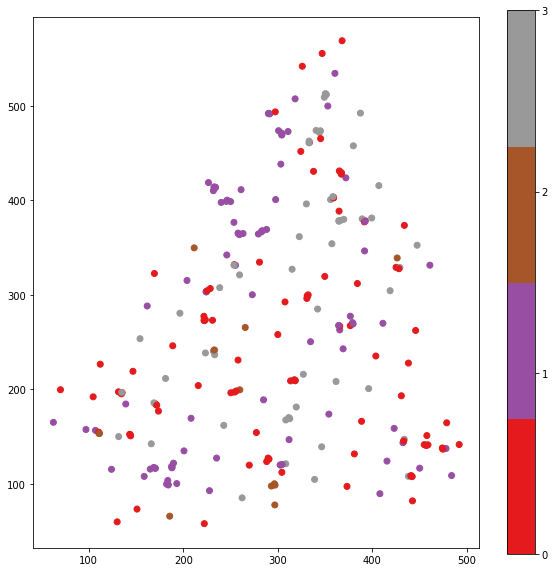

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(jura['Xloc'], jura['Yloc'], c=jura['kmeans'], cmap=plt.cm.get_cmap('Set1',4))
plt.axis('scaled')
plt.colorbar(ticks=range(5))
plt.show()

# Exercício ML supervisionado (classificação)

* Treine um classificador random forest para classificar removed_cat a partir das variáveis contínuas;
* Classifique onde removed_cat é NaN.

In [87]:
import numpy as np

In [97]:
#Definindo um array com os índices dos ítens removidos
indexes = np.random.randint(0, len(jura['Rock']), int(len(jura['Rock'])*0.1))

In [109]:
#Copiando a coluna Rock na array removed_cat
removed_cat = jura['Rock'].values.copy()

In [123]:
#Subsituindo onde existe NaN por -999. Necessário por questoes computacionais
removed_cat[indexes] = -999

In [124]:
#Redefinindo removed_cat com NaN onde é -999
removed_cat = np.where(removed_cat==-999, np.nan, removed_cat)

In [125]:
#Adicionando ao dataframe
jura['removed_cat'] = removed_cat

In [126]:
#Definindo o subconjunto de dados para treino (das variáveis dependentes)
X_train = jura.dropna()[['Cd', 'Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn']]

In [127]:
#Definindo o subconjunto 'resposta' de dados para treino (variável independente)
y_train = jura.dropna()[['removed_cat']]

In [133]:
#Definindo o subconjunto de dados para predição
filtro = np.isnan(jura['removed_cat']) #Filtrando onde não há Rock
X_prediction = jura[['Cd', 'Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn']][filtro].values #Definindo o subconjunto de variáveis dependentes onde não há Rock

In [134]:
from sklearn import ensemble

In [135]:
#Criando o objeto
rf = ensemble.RandomForestClassifier()

In [136]:
#Fitando (usando os subconjuntos de dados de treino)
rf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
#Predizendo (usando o subconjunto de dados de predição)
rf.predict(X_prediction)

array([2., 3., 2., 3., 2., 1., 3., 5., 3., 1., 1., 3., 1., 2., 2., 3., 3.,
       3., 1., 2., 1., 5., 5., 2.])

# Exercício ML supervisionado (regressão)

* Treine um regressor random forest para classificar removed_cd a partir das variáveis contínuas;
* Classifique onde removed_cd é NaN.

In [140]:
import numpy as np

In [141]:
#Definindo um array com os índices dos ítens removidos
indexes = np.random.randint(0, len(jura['Cd']), int(len(jura['Cd'])*0.1))

In [142]:
#Copiando a coluna Cd na array removed_cat
removed_cat = jura['Cd'].values.copy()

In [143]:
#Subsituindo onde existe NaN por -999. Necessário por questoes computacionais
removed_cat[indexes] = -999

In [144]:
#Redefinindo removed_cat com NaN onde é -999
removed_cat = np.where(removed_cat==-999, np.nan, removed_cat)

In [145]:
#Adicionando ao dataframe
jura['removed_cat'] = removed_cat

In [146]:
#Definindo o subconjunto de dados para treino (das variáveis dependentes)
X_train = jura.dropna()[['Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn']]

In [147]:
#Definindo o subconjunto 'resposta' de dados para treino (variável independente)
y_train = jura.dropna()[['removed_cat']]

In [148]:
#Definindo o subconjunto de dados para predição
filtro = np.isnan(jura['removed_cat']) #Filtrando onde não há Rock
X_prediction = jura[['Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn']][filtro].values #Definindo o subconjunto de variáveis dependentes onde não há Rock

In [149]:
from sklearn import ensemble

In [150]:
#Criando o objeto
rf = ensemble.RandomForestRegressor()

In [151]:
#Fitando (usando os subconjuntos de dados de treino)
rf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [152]:
#Predizendo (usando o subconjunto de dados de predição)
rf.predict(X_prediction)

array([1.7451, 1.0267, 2.6547, 0.882 , 1.1178, 0.485 , 0.783 , 1.9496,
       1.2767, 1.5664, 1.6285, 2.079 , 0.6415, 0.2895, 1.477 , 1.4575,
       1.771 , 1.885 , 1.2474, 0.264 , 1.4035, 0.8935, 0.5965, 0.8065,
       0.747 ])